## Week 12 Assignment - W200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. This assignment addresses material covered in Unit 11. Please upload this **Notebook** with your solutions to your GitHub repository in your SUBMISSIONS/week_12 folder by 11:59PM PST the night before class. Do **NOT** push/upload the data file. If you turn-in anything on ISVC please do so under the Week 12 Assignment category. 

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1Lgg-PwXQ6TQLDowd6XyBxZw5g1NGWPjB/view?usp=sharing. You should download and save this file in the same folder as this notebook is stored.  This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say YOUR ANSWER HERE to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)

## Setup

Run the two cells below. 

The first cell will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.  

The second cell subsets the dataframe to focus on just the primary period through May 2016. Otherwise, we would see general election donations which would make it harder to draw conclusions about the primaries.

In [429]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Define a date parser to pass to read_csv
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('P00000001-CA.csv', index_col=False, parse_dates=['contb_receipt_dt'], date_parser=d)
print(contrib.shape)

# Note - for now, it is okay to ignore the warning about mixed types. 

/Users/tiffany/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-429-44fe46b618d3>:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')


(1125659, 18)


In [430]:
# Subset data to primary period 
contrib = contrib.copy()[contrib['contb_receipt_dt'] <= datetime.datetime(2016, 5, 31)]
print(contrib.shape)

(654502, 18)


## 1. Data  Exploration (20 points)

**1a. First, take a preliminary look at the data.**
- Print the *shape* of the data. What does this tell you about the number of variables and rows you have?
- Print a list of column names. 
- Review the documentation for this data (link above). Do you have all of the columns you expect to have?
- Sometimes variable names are not clear unless we read the documentation. In your own words, based on the documentation, what information does the `election_tp` variable contain?

In [431]:
print(contrib.columns)

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp'],
      dtype='object')


The shape data tells me that there are 1,125,659 rows, 18 columns total in the dataset. The subset of the data we're looking at has 654,502 rows and 18 columns. 

Comparing the list of the columns in the data subset at hand to the documentation, it does appear we have all the columns (a total of 18) we should have. 

The election type variable indicates the election for which the contribution was made (primary, general, other, etc.) It is a string variable.

**1b. Print the first 5 rows from the dataset to manually check some of the data.** 

This is a good idea to ensure the data loaded and the columns parsed correctly!

In [432]:
contrib.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","AULL, ANNE",LARKSPUR,CA,"949,391,913.00",NaN,RETIRED,50.00,2016-04-26,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4768722,P2016
1,C00575795,P00003392,"Clinton, Hillary Rodham","CARROLL, MARYJEAN",CAMBRIA,CA,"934,284,638.00",NaN,RETIRED,200.00,2016-04-20,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4747242,P2016
2,C00575795,P00003392,"Clinton, Hillary Rodham","GANDARA, DESIREE",FONTANA,CA,"923,371,507.00",NaN,RETIRED,5.00,2016-04-02,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4666603,P2016
3,C00577130,P60007168,"Sanders, Bernard","LEE, ALAN",CAMARILLO,CA,"930,111,214.00",AT&T GOVERNMENT SOLUTIONS,SOFTWARE ENGINEER,40.00,2016-03-04,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWA097,P2016
4,C00577130,P60007168,"Sanders, Bernard","LEONELLI, ODETTE",REDONDO BEACH,CA,"902,784,310.00",VERICOR ENTERPRISES INC.,PHARMACIST,35.00,2016-03-05,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKX3MB3,P2016


**1c. Pick three variables from the dataset above and run some quick sanity checks.**

When working with a new dataset, it is important to explore and sanity check your variables. For example, you may want to examine the maximum and minimum values, a frequency count, or something else. Use the three markdown cells below to explain if your **three** chosen variables "pass" your sanity checks or if you have concerns about the integrity of your data and why. 

In [433]:
# Checking contrb_receipt_amt 
# Reported contribution amount 
column = contrib["contb_receipt_amt"]

contrib.info()

print("-------------")

#check min, max of this field 
print("Max: ", column.max())
print("Min: ",column.min()) #how is it a negative?

#avg
print("Mean: ", column.mean())

print("Any negative values: ", (column < 0).any())

#how many null or NaN
print(contrib['contb_receipt_amt'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654502 entries, 0 to 1125658
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   cmte_id            654502 non-null  object        
 1   cand_id            654502 non-null  object        
 2   cand_nm            654502 non-null  object        
 3   contbr_nm          654502 non-null  object        
 4   contbr_city        654501 non-null  object        
 5   contbr_st          654502 non-null  object        
 6   contbr_zip         654498 non-null  object        
 7   contbr_employer    606837 non-null  object        
 8   contbr_occupation  649308 non-null  object        
 9   contb_receipt_amt  654502 non-null  float64       
 10  contb_receipt_dt   654502 non-null  datetime64[ns]
 11  receipt_desc       10446 non-null   object        
 12  memo_cd            25635 non-null   object        
 13  memo_text          381561 non-null  object 

In [434]:
# checking contbr_st (should all be CA)
column = contrib["contbr_st"]

print(len(pd.unique(column)))

1


In [435]:
# checking contb_receipt_dt
column = contrib["contb_receipt_dt"]
print("Max: ", column.max())
print("Min: ",column.min()) 

Max:  2016-05-31 00:00:00
Min:  2013-11-05 00:00:00


Contribution Receipt Amount: Did not pass sanity check 
This field has a negative number in it which is not explained in the documentation. It does not seem sensical for a negative contribution to be possible unless someone demanded a refund. All else (max, mean, data type) seem to look fine. 

Contbr_st: Passed
There should only be one value in this field - CA. Only 1 unique value was detected.

Contb_receipt_dt: Passed
The max and mins look reasonable for this field - I think the format could be updated to only include the date 


**1d. Plotting a histogram** 

Make a histogram of **one** of the variables you picked above. What are some insights that you can see from this histogram? 
Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values
- Hint: For some variables the range of values is very large. To do a better exploration, make the initial histogram the full range and then you can make a smaller histogram 'zoomed' in on a discreet range.

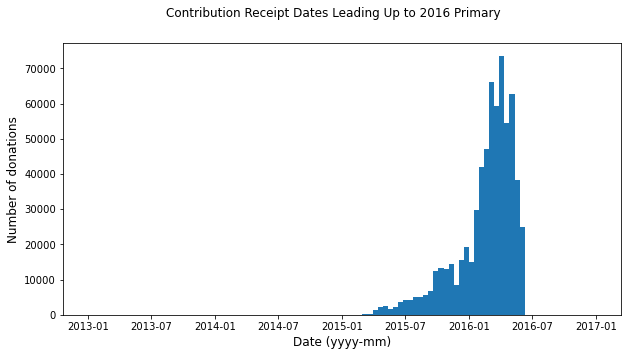

In [436]:
from matplotlib.pyplot import figure
import matplotlib.dates as mdates

fig = plt.figure()
plt.hist(contrib['contb_receipt_dt'], bins=100, range=["2013-01-01","2016-12-31"])
fig.suptitle('Contribution Receipt Dates Leading Up to 2016 Primary')
plt.xlabel('Date (yyyy-mm)', fontsize=12)
plt.ylabel('Number of donations', fontsize=12)
fig.set_size_inches(10,5)

The distribution shows that there was a lot of contribution activity in the year and a half lead up to the election with somewhat of a steep decline in amount around June 2016. There were small amounts of donations coming in starting in 2013 and until late 2016 but the distribution doesn't easily show that due to the large amounts around election time. 

## 2. Exploring Campaign Contributions (30 points)

Let's investigate the donations to the candidates.

**2a. Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number of contributions (variable 'contb_receipt_amt')?

In [437]:
cbc = contrib.tran_id.groupby(contrib.cand_nm)
cbc.size().sort_values(ascending=False)

cand_nm
Sanders, Bernard             371795
Clinton, Hillary Rodham      163509
Cruz, Rafael Edward 'Ted'     57136
Carson, Benjamin S.           27342
Rubio, Marco                  14089
Fiorina, Carly                 4696
Paul, Rand                     4256
Bush, Jeb                      3114
Kasich, John R.                2988
Trump, Donald J.               2255
Walker, Scott                   713
Huckabee, Mike                  531
O'Malley, Martin Joseph         397
Lessig, Lawrence                372
Graham, Lindsey O.              342
Christie, Christopher J.        333
Stein, Jill                     197
Perry, James R. (Rick)          116
Webb, James Henry Jr.           106
Santorum, Richard J.             84
Johnson, Gary                    77
Jindal, Bobby                    31
Pataki, George E.                20
Gilmore, James S III              3
Name: tran_id, dtype: int64

Bernard Sanders

**2b. Now, present a table that shows the total value of donations to each candidate. sorted by total value of the donations**

Which candidate raised the most money in California?

In [438]:
tcc = contrib.contb_receipt_amt.groupby(contrib.cand_nm)
tcc.sum().sort_values(ascending=False)

cand_nm
Clinton, Hillary Rodham     39,368,777.01
Sanders, Bernard            18,773,871.31
Cruz, Rafael Edward 'Ted'    6,286,460.34
Rubio, Marco                 4,846,483.72
Bush, Jeb                    3,325,536.83
Carson, Benjamin S.          2,952,109.00
Kasich, John R.              1,553,823.54
Fiorina, Carly               1,468,489.42
Trump, Donald J.               893,356.89
Paul, Rand                     797,624.29
Walker, Scott                  495,006.90
Christie, Christopher J.       456,066.00
Graham, Lindsey O.             408,595.00
O'Malley, Martin Joseph        297,834.26
Huckabee, Mike                 230,890.60
Perry, James R. (Rick)         208,400.00
Lessig, Lawrence               186,144.50
Webb, James Henry Jr.           76,568.16
Johnson, Gary                   41,187.60
Santorum, Richard J.            36,304.88
Pataki, George E.               30,450.00
Stein, Jill                     27,918.00
Jindal, Bobby                   23,231.26
Gilmore, James S III      

Hillary Clinton

**2c. Combine the tables (sorted by either a or b above).**

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [439]:
cbc_df = cbc.size().sort_values(ascending=False).to_frame(name = "Count_Contributions").reset_index()
tcc_df = tcc.sum().sort_values(ascending=False).to_frame(name = "Sum_Contributions").reset_index()

cbc_df = cbc_df.rename(columns = {'cand_nm':'Candidate_Name'})
tcc_df = tcc_df.rename(columns = {'cand_nm':'Candidate_Name'})

combined = pd.merge(cbc_df, tcc_df, on="Candidate_Name")

combined

,Candidate_Name,Count_Contributions,Sum_Contributions
0,"Sanders, Bernard",371795,"18,773,871.31"
1,"Clinton, Hillary Rodham",163509,"39,368,777.01"
2,"Cruz, Rafael Edward 'Ted'",57136,"6,286,460.34"
3,"Carson, Benjamin S.",27342,"2,952,109.00"
4,"Rubio, Marco",14089,"4,846,483.72"
5,"Fiorina, Carly",4696,"1,468,489.42"
6,"Paul, Rand",4256,"797,624.29"
7,"Bush, Jeb",3114,"3,325,536.83"
8,"Kasich, John R.",2988,"1,553,823.54"
9,"Trump, Donald J.",2255,"893,356.89"


**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation**

In [440]:
avg_scores = [row.Sum_Contributions / row.Count_Contributions for index, row in combined.iterrows()]

avg_scores = [float("%.2f"%cont) for cont in avg_scores]

combined['Avg_Contribution'] = avg_scores

combined = combined.sort_values("Avg_Contribution", ascending=False)

combined


,Candidate_Name,Count_Contributions,Sum_Contributions,Avg_Contribution
23,"Gilmore, James S III",3,"8,100.00","2,700.00"
17,"Perry, James R. (Rick)",116,"208,400.00","1,796.55"
22,"Pataki, George E.",20,"30,450.00","1,522.50"
15,"Christie, Christopher J.",333,"456,066.00","1,369.57"
14,"Graham, Lindsey O.",342,"408,595.00","1,194.72"
7,"Bush, Jeb",3114,"3,325,536.83","1,067.93"
12,"O'Malley, Martin Joseph",397,"297,834.26",750.21
21,"Jindal, Bobby",31,"23,231.26",749.40
18,"Webb, James Henry Jr.",106,"76,568.16",722.34
10,"Walker, Scott",713,"495,006.90",694.26


**2e. Plotting a Bar Chart**

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Hint: Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

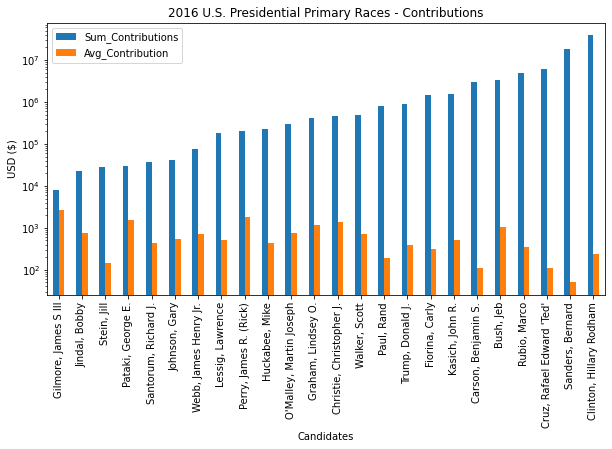

In [441]:

bc = combined.drop(columns=["Count_Contributions"])
bc=bc.sort_values(by="Sum_Contributions")

ax = bc.plot.bar(x="Candidate_Name", rot=90, figsize=(10,5), xlabel="Candidates", ylabel="USD ($)", title="2016 U.S. Presidential Primary Races - Contributions")
ax.set_yscale('log')





**2f. Comment on the results of your data analysis in a short paragraph.**

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

The candidate that garnered the second-highest sum of contributions in California had the lowest average contribution size. This means more people donated at lower amounts. The candidate that recieved the fewest total contributions in CA had the highest average contributions, meaning he recieved this sum as a result of fewer donations. It appears those who recieved more are likely more popular and thus likely to garner more support from every day people who tend to donate in smaller amounts. 

## 3. Exploring Donor Occupations (30 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a. Show the top 5 occupations of individuals that contributed to Hillary Clinton.** 

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [442]:
doex = contrib.groupby(contrib.cand_nm)
hrc = doex.get_group("Clinton, Hillary Rodham")

hrc = hrc.contbr_occupation.value_counts()
hrc = hrc.to_frame()

hrc.head()

,contbr_occupation
RETIRED,33450
ATTORNEY,7315
INFORMATION REQUESTED,4742
TEACHER,3591
HOMEMAKER,3436


**3b. Write a function called `get_donors`.**

Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [443]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    top_prof = df.contbr_occupation.value_counts()
    return top_prof.nlargest(n=5)

**3c. Now run the `get_donors` function on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below.**

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [444]:
cd = contrib.groupby(contrib.cand_nm)

#HRC
hrc2 = cd.get_group("Clinton, Hillary Rodham")
hrc2=get_donors(hrc2)

#Bern
bern = cd.get_group("Sanders, Bernard")
bern=get_donors(bern)

#dt
dt = cd.get_group("Trump, Donald J.")
dt=get_donors(dt)

print("Hillary: \n", hrc2, "\n\nBernie:\n", bern, "\n\nDonald:\n", dt)

Hillary: 
 RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
Name: contbr_occupation, dtype: int64 

Bernie:
 NOT EMPLOYED         96371
RETIRED              15048
TEACHER              10167
SOFTWARE ENGINEER     7861
ENGINEER              7094
Name: contbr_occupation, dtype: int64 

Donald:
 RETIRED                  849
INFORMATION REQUESTED     70
CEO                       57
OWNER                     51
PRESIDENT                 35
Name: contbr_occupation, dtype: int64


**3d. Finally, use `groupby` to separate the entire dataset by candidate.**

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [445]:
contrib.groupby(contrib.cand_nm).apply(get_donors)

cand_nm                                                          
Bush, Jeb                  RETIRED                                     996
                           HOMEMAKER                                   180
                           ATTORNEY                                     92
                           Q.A.                                         89
                           PRESIDENT                                    84
Carson, Benjamin S.        RETIRED                                   13692
                           INFORMATION REQUESTED PER BEST EFFORTS     1614
                           HOMEMAKER                                  1049
                           PHYSICIAN                                   329
                           R.N.                                        234
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e. Comment on your data insights & findings in a short paragraph.**

Very interesting! Even through his contributions data, Bernie Sanders really appears as the "people's" candidate with an overwhelming majority of donations from the unemployed. It seems reflective of his ethos and campaign messaging, focused on economic fairness for all.  To see how many contributions come from retired donors was really surprising - I did not expect this.

**3f. Think about your findings in section 3 vs. your findings in section 2 of this assignment.**

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

The average donation findings make a lot of sense based on the top occupations of donors. Bernie Sanders had the second-most donations in CA but the overwhelming majority of his donors were unemployed - I'd expect it to be much more likely that donations from unemployed donors are smaller than those who are employed -or- retired with some form of income. It's still surprising to me that the majority of donations overall come from retired donors although it does make sense that they would have more time to be more politically engaged or more likely to be solicited for donations as they may spend more time at home.


## 4. Plotting Data (20 points)

There is an important element that we have not yet explored in this dataset - time.

**4a. Present a single line chart with the following elements.**

- Show the date on the x-axis
- Show the contribution amount on the y-axis
- Include a title
- Include axis labels

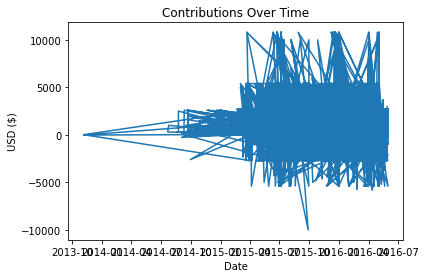

In [446]:
plt.plot(contrib.contb_receipt_dt, contrib.contb_receipt_amt)
plt.xlabel("Date")
plt.ylabel("USD ($)")
plt.title("Contributions Over Time")
plt.show()

**4b. Make a better time-series line chart**

This chart is messy and it is hard to gain insights from it.  Improve the chart from 4a so that your new chart shows a specific insight. In the spot provided, write the insight(s) that can be gained from this new time-series line chart.

<ipython-input-452-81e020385088>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_ticks])


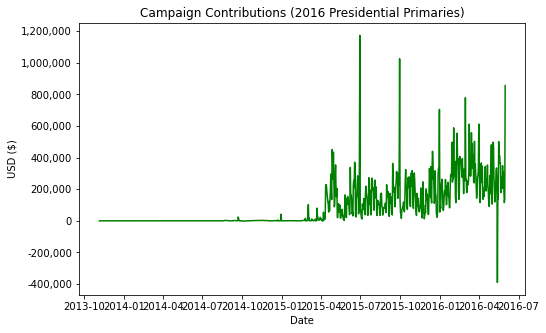

In [452]:
# 4b YOUR CODE HERE

cdates = contrib.contb_receipt_amt.groupby(contrib.contb_receipt_dt)
cdates = cdates.sum().sort_values(ascending=False)

cdates = cdates.to_frame("cdates")
cdates = cdates.reset_index()

cdates = cdates.rename(columns={"contb_receipt_dt":"Date","cdates":"Contribution_Total"})
cdates = cdates.sort_values(by="Date")


#plt.ylim(-20000, 1000000)

plt.plot(cdates.Date, cdates.Contribution_Total, color="green")
plt.xlabel("Date")
plt.ylabel("USD ($)")
plt.title("Campaign Contributions (2016 Presidential Primaries)")
current_ticks=plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_ticks])
plt.rcParams["figure.figsize"] = (8,5)
plt.show()


This chart is a huge improvement on the chart in 4A and the histogram of the same data above. It shows all contributions to all candidates leading up to the primary elections in 2016. It's easier to see from this graph that there are spike in donations along the timeline  - I assume this may be tied to certain events/milestones along the campaign trail such as debates, fundraising deadlines, or major announcements. It seems donations really picked up early on in the year, likely as the election news was heading up , and began to dip as the election drew nearer. The final jump in donations in mid 2016 appears to be a cut off date for election contributions.  

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k